In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!ls

In [ ]:
students = pd.read_csv('students.tsv',sep='\t' )
dolgolets = pd.read_csv('dolgolets.tsv', sep = '\t')

In [ ]:
students.columns = ['ID', 'квота сек', 'Слово', 'Предыдущее + слово', 'Первая_буква',
       'Стратегия', 'Порядок_буква', 'Порядок_весь_тест', 'Частотность',
       'Пауза', 'VP', 'VS', 'N of words', 'N of words_P', 'N of words_O',
       'N of words_S', 'Mean pause']

In [ ]:
dolgolets.columns



Index(['ID', 'Gender', 'Age', 'квота сек', 'Слово', 'Предыдущее + слово',
       'Стратегия', 'Первая_буква', 'Порядок_буква', 'Порядок_весь_тест',
       'Частотность', 'Пауза', 'VP', 'VS', 'N of words', 'N of words_P',
       'N of words_O', 'N of words_S', 'Mean pause'],
      dtype='object')

In [ ]:
dolgolets = dolgolets[students.columns]

In [ ]:
dolgolets['type'] = 'centenarians'
students['type'] = 'students'

In [ ]:
dolgolets.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,pr_A_1,1,папа,NaN,п,NaN,1.0,1,"143,4",NaN,NaN,NaN,47,15,13,19,"2,861590909",centenarians
1,pr_A_1,1,пошел,папа пошел,п,8,2.0,2,"587,2","0,37",NaN,NaN,47,15,13,19,"2,861590909",centenarians
2,pr_A_1,1,пришел,пошел пришел,п,2,3.0,3,"523,3","2,12",NaN,NaN,47,15,13,19,"2,861590909",centenarians
3,pr_A_1,1,пришить,пришел пришить,п,2,4.0,4,"5,9","8,12",1.0,1.0,47,15,13,19,"2,861590909",centenarians
4,pr_A_1,1,привезти,пришить привезти,п,2,5.0,5,82,"0,38",NaN,NaN,47,15,13,19,"2,861590909",centenarians


In [ ]:
students.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [ ]:
print(students['ID'].nunique())
print(dolgolets['ID'].nunique())

27
25


In [ ]:
df = pd.concat([students, dolgolets])
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,NaN,1.0,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8.0,2.0,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11.0,3.0,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8.0,4.0,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3.0,5.0,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [ ]:
df.dtypes

ID                     object
квота сек               int64
Слово                  object
Предыдущее + слово     object
Первая_буква           object
Стратегия              object
Порядок_буква         float64
Порядок_весь_тест       int64
Частотность            object
Пауза                  object
VP                    float64
VS                    float64
N of words              int64
N of words_P            int64
N of words_O            int64
N of words_S            int64
Mean pause             object
type                   object
dtype: object

# Преобразование данных

In [ ]:
df['Стратегия'] = df['Стратегия'].astype(str)
#df[df['Стратегия'].notnull()].Стратегия.astype('int32', errors = 'ignore')
df['Стратегия'] = df['Стратегия'].str.replace(r'.0', '')
df['Порядок_буква'] = df['Порядок_буква'].astype(str)
df['Порядок_буква'] = df['Порядок_буква'].str.replace(r'.0', '')
df.head()

,ID,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
0,Б_В_10,1,пара,NaN,п,nan,1,1,"152,7",NaN,NaN,NaN,59,28,13,18,"2,390357143",students
1,Б_В_10,1,период,пара период,п,8,2,2,"204,2","0,1",NaN,NaN,59,28,13,18,"2,390357143",students
2,Б_В_10,1,парад,период парад,п,11,3,3,"13,2","3,15",1.0,NaN,59,28,13,18,"2,390357143",students
3,Б_В_10,1,предлог,парад предлог,п,8,4,4,"12,7",1,1.0,NaN,59,28,13,18,"2,390357143",students
4,Б_В_10,1,по,предлог по,п,3,5,5,"5786,7","0,7",NaN,NaN,59,28,13,18,"2,390357143",students


In [ ]:
df['Предыдущее + слово'] = df['Предыдущее + слово'].str.split(' ')

In [ ]:
df1 = df.groupby("ID").agg(list)
df1['N of words_O'] = df1['N of words_O'].str[0]
df1['N of words'] = df1['N of words'].str[0]
df1['N of words_P'] = df1['N of words_P'].str[0]
df1['N of words_S'] = df1['N of words_S'].str[0]
df1['Mean pause'] = df1['Mean pause'].str[0]
df1['type'] = df1['type'].str[0]
df1.head()


,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
pr_A_1,"[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, ...","[папа, пошел, пришел, пришить, привезти, прико...","[nan, [папа, пошел], [пошел, пришел], [пришел,...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 2, 2, 2, 2, 8, 6, 8, 8, 1, 1, 8, 3, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 587,2, 523,3, 5,9, 82, 2,2, 2,4, 27,2,...","[nan, 0,37, 2,12, 8,12, 0,38, 3,53, 2,62, 2,01...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...","[nan, nan, nan, 1.0, nan, 1.0, nan, nan, 1.0, ...",47,15,13,19,"2,861590909",centenarians
pr_B_1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, ...","[по, прилетел, пошел, поел, пахал, папа, певец...","[nan, [по, прилетел], [прилетел, пошел], [поше...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 3, 7, 8, 8, 8, 8, 8, 8, 8, 3, 8, 2, 4...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[5790,8, 24,4, 587,2, 18,3, 9,2, 143,4, 28,4, ...","[nan, 0,01, 0,01, 0,01, 1,66, 0,89, 1,24, 2,2,...","[nan, nan, nan, nan, nan, nan, nan, nan, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, 1.0, 1.0, ...",54,18,16,20,"2,68627451",centenarians
pr_E_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[педагог, предмет, полочка, пушка, портфель, п...","[nan, [педагог, предмет], [предмет, полочка], ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 7, 3, 8, 8, 3, 3, 8, 8, 8, 8, 3, 8, 1, 3...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[27,1, 154,4, 5,9, 24,6, 31,2, 29,7, 1,6, 51,7...","[nan, 0,01, 0,54, 0,72, 2,82, 1,21, 0,75, 1,66...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",55,24,12,19,"2,7475",centenarians
pr_G_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[помидор, память, папа, последовательность, пр...","[nan, [помидор, память], [память, папа], [папа...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 7, 3, 8, 8, 1, 8, 3, 3, 1, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[15,4, 174,5, 143,4, 32,2, 371,7, 89,3, 51,7, ...","[nan, 0,01, 0,38, 0,72, 0,35, 0,01, 0,92, 1,14...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",58,16,18,24,"2,238181818",centenarians
pr_I_1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[правда, поле, полис, путешествие, погода, пра...","[nan, [правда, поле], [поле, полис], [полис, п...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 1, 8, 3, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[428,5, 180,2, 6,8, 42,4, 51,7, 12,6, 3,6, 55,...","[nan, 0,23, 0,64, 1,16, 0,27, 3,05, 1,55, 2,17...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",51,23,11,17,"2,9675",centenarians


In [ ]:
df1.tail()

,квота сек,Слово,Предыдущее + слово,Первая_буква,Стратегия,Порядок_буква,Порядок_весь_тест,Частотность,Пауза,VP,VS,N of words,N of words_P,N of words_O,N of words_S,Mean pause,type
ID,,,,,,,,,,,,,,,,,
Ф_Д_2,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 1, ...","[пробка, паттерн, пиво, повар, пилка, плитка, ...","[nan, [пробка, паттерн], [паттерн, пиво], [пив...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, о, ...","[nan, 8, 8, 8, 11, 1, 8, 8, 8, 1, 8, 8, 8, 2, ...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[21,3, nan, 60,3, 13,3, 0,9, 11,5, 15,4, 33,1,...","[nan, 2,11, 2,18, 0,7, 0,4, 1,98, 0,75, 4,04, ...","[1.0, 1.0, 1.0, nan, nan, 1.0, nan, 1.0, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",38,14,9,15,"4,003714286",students
Х_М_3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, ...","[пирог, пиво, память, понимание, писать, прогр...","[nan, [пирог, пиво], [пиво, память], [память, ...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[16,3, 60,3, 174,5, 86,7, 444,3, 28,5, 4,1, 19...","[nan, 0,85, 0,1, 1,54, 1,18, 1,43, 1,59, 2,39,...","[1.0, nan, nan, 1.0, nan, 1.0, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",40,17,11,12,"3,553783784",students
Ш_А_26,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, ...","[простофиля, потолок, пол, потоп, памятка, пли...","[nan, [простофиля, потолок], [потолок, пол], [...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 7, 8, 8, 8, 22, 8, 8, 8, 8, 11, 8, 8,...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0,7, 57,9, 181,9, 4,2, 1,5, 37,3, 174,5, 7,9,...","[nan, 0,1, 0,1, 0,93, 1,49, 0,9, 0,1, 4,32, 3,...","[nan, nan, nan, 1.0, 1.0, 1.0, nan, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,19,11,13,"3,0875",students
Ш_Ю_23,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, ...","[парк, правда, погода, природа, пойти, поесть,...","[nan, [парк, правда], [правда, погода], [погод...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 3, 8, 7, 3, 8, 8, 2, 3, 1, 8, 8, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[69,5, 428,5, 51,7, 169,9, 587,2, 18,3, 158,4,...","[nan, 0,1, 0,1, 0,1, 1,64, 0,1, 0,1, 0,1, 0,44...","[nan, nan, nan, nan, 1.0, nan, nan, nan, nan, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",65,24,19,22,"1,718870968",students
Я_Д_18,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[папа, помидор, почка, печень, пол, потолок, п...","[nan, [папа, помидор], [помидор, почка], [почк...","[п, п, п, п, п, п, п, п, п, п, п, п, п, п, п, ...","[nan, 8, 8, 8, 8, 7, 8, 2, 1, 8, 2, 8, 1, 1, 8...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[143,4, 15,4, 16,2, 19,1, 181,9, 57,9, 0,8, na...","[nan, 0,1, 2,47, 0,74, 1,05, 0,77, 3,32, 1,23,...","[nan, nan, 1.0, nan, nan, 1.0, 1.0, 1.0, 1.0, ...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",43,18,10,15,"3,41375",students


In [ ]:
#1 стратегия - пауза

# частотность - частота, сравнить 

# Анализ стратегий и частот

1 стратегия - пауза

частотность - частота, сравнить

частотность определенных стратегий


In [ ]:
def count_values_freq(lst):
    freq_dict = {}
    for value in lst:
        if value in freq_dict:
            freq_dict[value] += 1
        else:
            freq_dict[value] = 1
    return freq_dict

In [ ]:
df1['strategyfreq_dict'] = df1['Стратегия'].apply(count_values_freq)

In [ ]:
df1.iloc[0,17].keys()
df1.iloc[0,17].values()

dict_values([3, 16, 5, 2, 9, 9, 1, 1, 1])

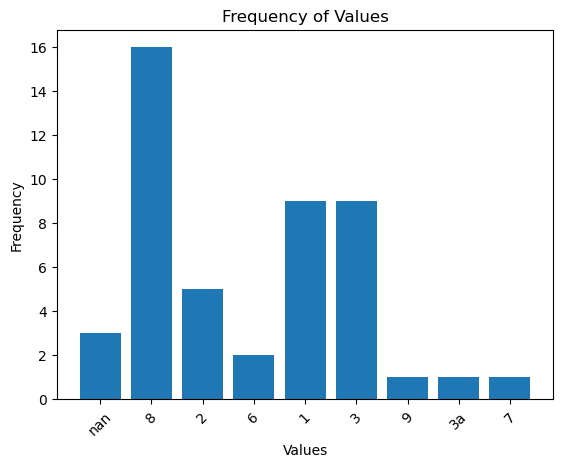

In [ ]:
plt.bar(df1.iloc[0,17].keys(), df1.iloc[0,17].values())

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Frequency of Values')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()



In [ ]:
df = df1[['strategyfreq_dict']]

In [ ]:
def expand_dict_column(row):
    for key, value in row['strategyfreq_dict'].items():
        row[key] = int(value)
    return row

# Применяем функцию к каждой строке DataFrame
df = df.apply(expand_dict_column, axis=1)

# Удаляем столбец со словарями (если требуется)
#df.drop('dict_column', axis=1, inplace=True)

# Выводим DataFrame с новыми столбцами
df.head()

,1,11,1а,2,22,2а,3,33,3a,3а,...,4,4а,5,6,66,7,8,9,nan,strategyfreq_dict
ID,,,,,,,,,,,,,,,,,,,,,
pr_A_1,9.0,NaN,NaN,5.0,NaN,NaN,9.0,NaN,NaN,1.0,...,NaN,NaN,NaN,2.0,NaN,1.0,16,1.0,3,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,10.0,NaN,NaN,3.0,NaN,NaN,7.0,NaN,NaN,5.0,...,2.0,NaN,NaN,NaN,NaN,2.0,22,NaN,3,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,5.0,NaN,NaN,1.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,2.0,36,NaN,3,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,13.0,NaN,NaN,1.0,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,33,1.0,3,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 13, '..."
pr_I_1,3.0,NaN,1.0,1.0,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,2.0,34,1.0,3,"{'nan': 3, '8': 34, '1': 3, '3': 5, '7': 2, '9..."


In [ ]:
df = df.fillna(0)
df.columns

Index(['1', '11', '1а', '2', '22', '2а', '3', '33', '3a', '3а', '3а’', '4',
       '4а', '5', '6', '66', '7', '8', '9', 'nan', 'strategyfreq_dict'],
      dtype='object')

In [ ]:
df['1'] = df['1'] + df['11'] + df['1а']
df['2'] = df['2'] + df['22'] + df['2а']
df['3'] = df['3'] + df['33'] + df['3a'] + df['3а'] + df['3а’']
df['4'] = df['4'] + df['4а']
df['6'] = df['6'] + df['66']

columns_to_drop = ['11', '1а', '22', '2а',  '33', '3a', '3а', '3а’', '4а', '66']
df = df.drop(columns=columns_to_drop)

In [ ]:
#df = df.drop(['nan'])
df.columns
df = df.drop(['nan'], axis=1)
df.head()

,1,2,3,4,5,6,7,8,9,strategyfreq_dict
ID,,,,,,,,,,
pr_A_1,9.0,5.0,10.0,0.0,0.0,2.0,1.0,16,1.0,"{'nan': 3, '8': 16, '2': 5, '6': 2, '1': 9, '3..."
pr_B_1,10.0,3.0,12.0,2.0,0.0,0.0,2.0,22,0.0,"{'nan': 3, '8': 22, '3': 7, '7': 2, '2': 3, '4..."
pr_E_1,5.0,1.0,7.0,0.0,1.0,0.0,2.0,36,0.0,"{'nan': 3, '7': 2, '3': 7, '8': 36, '1': 5, '5..."
pr_G_1,13.0,1.0,4.0,0.0,0.0,0.0,3.0,33,1.0,"{'nan': 3, '8': 33, '7': 3, '3': 4, '1': 13, '..."
pr_I_1,4.0,1.0,5.0,0.0,0.0,1.0,2.0,34,1.0,"{'nan': 3, '8': 34, '1': 3, '3': 5, '7': 2, '9..."


Стратегии вытянуты

In [ ]:
df = df.drop(['strategyfreq_dict'], axis = 1)


In [ ]:
df['strat_sum'] = df['1'] + df['2'] + df['3'] + df['4'] + df['5'] + df['6'] + df['7'] + df['8'] + df['9']


In [ ]:
dff = df.copy()
for col in dff.columns[:-1]:  # Исключаем последний столбец strat_sum
    dff[col] = dff[col] / df['strat_sum']

dff = dff.drop(['strat_sum'], axis = 1)
dff.head()

,1,2,3,4,5,6,7,8,9
ID,,,,,,,,,
pr_A_1,0.204545,0.113636,0.227273,0.000000,0.000000,0.045455,0.022727,0.363636,0.022727
pr_B_1,0.196078,0.058824,0.235294,0.039216,0.000000,0.000000,0.039216,0.431373,0.000000
pr_E_1,0.096154,0.019231,0.134615,0.000000,0.019231,0.000000,0.038462,0.692308,0.000000
pr_G_1,0.236364,0.018182,0.072727,0.000000,0.000000,0.000000,0.054545,0.600000,0.018182
pr_I_1,0.083333,0.020833,0.104167,0.000000,0.000000,0.020833,0.041667,0.708333,0.020833


In [ ]:
dff.iloc[0,0]

NameError: name 'dff' is not defined

dff - композиционный данные, представлены в виде частот. 

In [ ]:
# Plotting the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(dff.index, df['1'], label='1')
bottom = dff['1']
for col in dff.columns[1:]:
    plt.bar(dff.index, dff[col], bottom=bottom, label=col)
    bottom += dff[col]
plt.xlabel('ID')
plt.ylabel('Percentage')
plt.title('Stacked Bar Plot of Percentages')
plt.legend(title='Column')
plt.xticks(rotation=45)
plt.show()